In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import force_module as force
from force_module import HP
import FF_module as FF

import importlib
import copy

   N:  1000
   g:  1.3
   p:  1.0
   nRec2Out:  1000
   alpha:  1.000
   nsecs_train:  1500
   learn_every:  1



## FORCE inp targ

In [3]:
def get_inp_target_1(simtime, dt, voltage, amp, freq, noise_scale=0.2):
    """For epoch 0: before BC. should show baseline actiivty."""
    inp = np.zeros(simtime.shape)

    # tail activity: baseline.
    trend = 2
    tail_activity = (force.get_ft(simtime, amp, freq) + trend +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    hint = np.zeros(tail_activity.shape)

    return inp, tail_activity, hint


def get_inp_target_2(simtime, dt, voltage, amp, freq, noise_scale=0.2):
    """For epoch 1: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int(simtime.shape[0] / shock.shape[0]))

    # tail activity: increase for first 100 sec, then decrease for rest. Should decrease
    # below baseline. Since the original data cannot be acquired,
    trend = np.append(np.linspace(2.5, 3.5, int(100 / dt)),
                      np.linspace(3.5, 2.8, int(simtime.shape[0] - 100 / dt)))
    tail_activity = (force.get_ft(simtime, amp, freq) + trend +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    return inp_shock, tail_activity, trend

def get_inp_target_3(simtime, dt, voltage, amp, freq, noise_scale=0.2):
    """For epoch 2: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int(simtime.shape[0] / shock.shape[0]))

    # tail activity: increase for first 250 sec, then decrease. Should decrease
    # below baseline. Since the original data cannot be acquired,
    trend = np.linspace(1.2, 0.5, simtime.shape[0])
    tail_activity = (force.get_ft(simtime, amp, freq) + trend +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    hint = np.full(tail_activity.shape, trend)

    return inp_shock, tail_activity, hint



## Full FORCE inp targ

In [4]:
def get_inp_target_1_FF(dt, voltage, amp, freq, T=360, noise_scale=0.2):
    """For epoch 0: before BC. should show baseline actiivty."""
    simtime = np.arange(0, T, dt)
    inp, tail_activity, hint = get_inp_target_1(simtime, dt, voltage, amp, freq, noise_scale=noise_scale)

    inp = np.ones(inp.shape)
    inp = np.expand_dims(inp, axis=(0, 2))
    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))
    hint = np.expand_dims(hint, axis=(0,2))

    return inp, tail_activity, hint


def get_inp_target_2_FF(dt, voltage, amp, freq, T=360, noise_scale=0.2):
    """For epoch 1: should increase and the ndecrease below baseline activity."""
    simtime = np.arange(0, T, dt)
    inp, tail_activity, hint = get_inp_target_2(simtime, dt, voltage, amp, freq, noise_scale=noise_scale)

    inp = np.expand_dims(inp, axis=(0, 2))
    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))
    hint = np.expand_dims(hint, axis=(0,2))

    return inp, tail_activity, hint

def get_inp_target_3_FF(dt, voltage, amp, freq, T=360, noise_scale=0.2):
    """For epoch 2: should increase and the ndecrease below baseline activity."""
    simtime = np.arange(0, T, dt)
    inp, tail_activity, hint = get_inp_target_3(simtime, dt, voltage, amp, freq, noise_scale=noise_scale)

    inp = np.expand_dims(inp, axis=(0, 2))
    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))
    hint = np.expand_dims(hint, axis=(0,2))

    return inp, tail_activity, hint



## Load FORCE

In [5]:
importlib.reload(force)
hp = HP()
hp.nsecs_train = 360
hp.nsecs_test = 360
hp.freq = 1 / 12
simtime_train = np.arange(0, hp.nsecs_train, hp.dt)
simtime_test = np.arange(hp.nsecs_train, hp.nsecs_train + hp.nsecs_test,
                         hp.dt)

network = force.all2all(hp.N, hp.p, hp.g, hp.alpha, hp.learn_every,
                        hp.nRec2Out, simtime_train.shape[0], num_inputs=3,
                        num_outputs=1)

epochs = []
num_epochs = 10

   N:  1000
   g:  1.3
   p:  1.0
   nRec2Out:  1000
   alpha:  1.000
   nsecs_train:  1500
   learn_every:  1



## Epoch 1

time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 0: "0.124"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 1: "0.100"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 2: "0.092"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 3: "0.089"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 4: "0.093"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 5: "0.092"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 6: "0.086"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
t

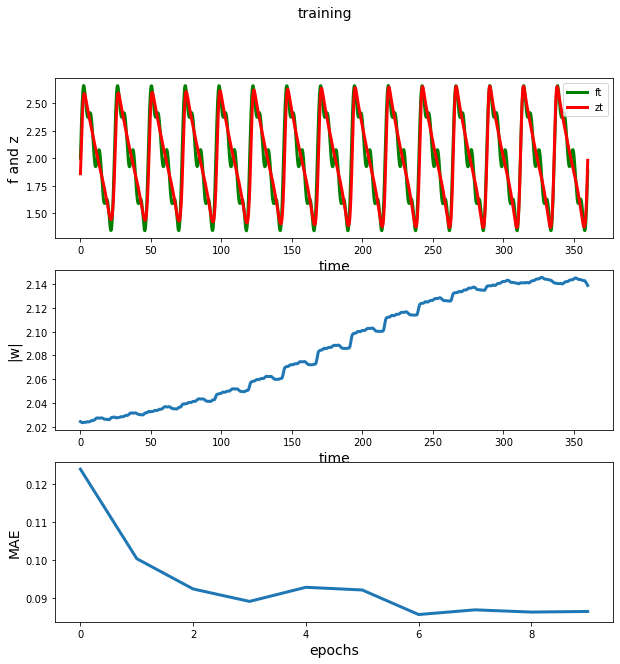

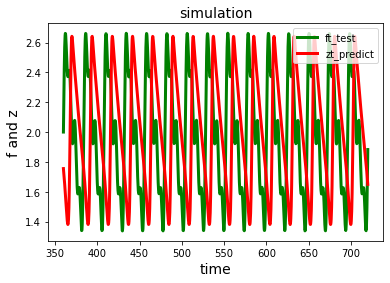

In [6]:
inp_train, ft, hint = get_inp_target_1(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test, ft_test, hint_test = get_inp_target_1(simtime_test, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)

inp_train = np.expand_dims(inp_train, axis=1)
ft = np.expand_dims(ft, axis=1)
hint = np.expand_dims(hint, axis=1)
inp_test = np.expand_dims(inp_test, axis=1)
ft_test = np.expand_dims(ft_test, axis=1)
hint_test = np.expand_dims(hint_test, axis=1)

inp_train = np.hstack((inp_train, np.zeros(ft.shape), np.zeros(hint.shape)))  # (T, 3)
inp_test = np.hstack((inp_test, np.zeros(ft_test.shape), np.zeros(hint_test.shape)))  # (T, 3)


x, rate, zt = network.train(simtime_train, np.squeeze(ft), hp.nsecs_train, hp.dt, hp.tau, H=inp_train, num_epochs=num_epochs)
zt_predict = network.test(simtime_test, np.squeeze(ft_test), x, rate, hp.dt, hp.tau, H=inp_test, num_epochs=num_epochs)

epochs.append(copy.deepcopy(network))

plt.show()


## Epoch 2

time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 0: "0.295"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 1: "0.359"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 2: "0.356"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 3: "0.340"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 4: "0.331"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 5: "0.316"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 6: "0.309"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
t

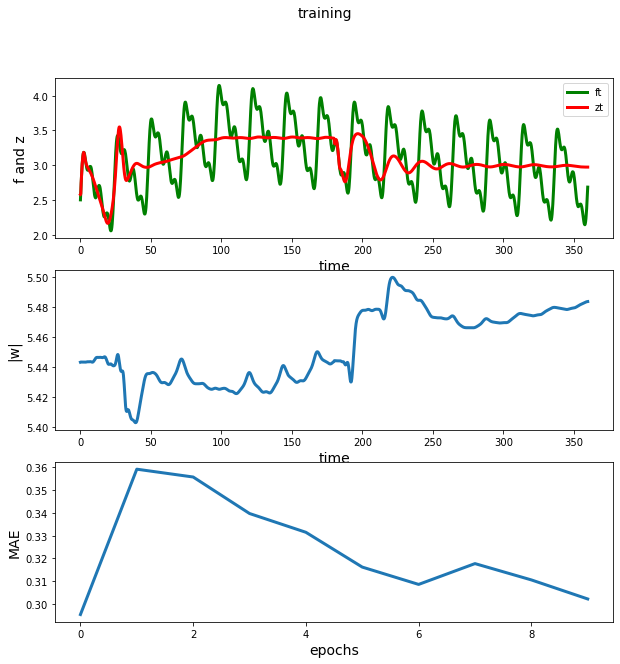

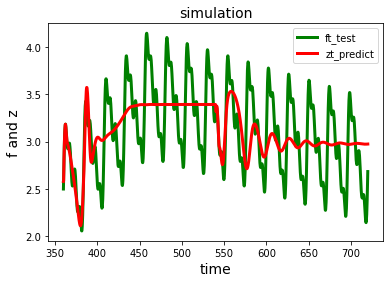

In [7]:
inp_train, ft, hint = get_inp_target_2(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test, ft_test, hint_test = get_inp_target_2(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)

inp_train = np.expand_dims(inp_train, axis=1)
ft = np.expand_dims(ft, axis=1)
hint = np.expand_dims(hint, axis=1)
inp_test = np.expand_dims(inp_test, axis=1)
ft_test = np.expand_dims(ft_test, axis=1)
hint_test = np.expand_dims(hint_test, axis=1)

inp_train = np.hstack((inp_train, np.zeros(ft.shape), np.zeros(hint.shape)))  # (T, 3)
inp_test = np.hstack((inp_test, np.zeros(ft_test.shape), np.zeros(hint_test.shape)))  # (T, 3)

x, rate, zt = network.train(simtime_train, np.squeeze(ft), hp.nsecs_train, hp.dt, hp.tau, inp_train, num_epochs=num_epochs)
zt_predict = network.test(simtime_test, np.squeeze(ft_test), x, rate, hp.dt, hp.tau, inp_test, num_epochs=num_epochs)


epochs.append(copy.deepcopy(network))

plt.show()

## Epoch 3

time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 0: "0.195"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 1: "0.172"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 2: "0.113"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 3: "0.186"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 4: "0.162"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 5: "0.125"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
time:  225.0
time:  270.0
time:  315.0
Training MAE for epoch 6: "0.127"
time:  0.0
time:  45.0
time:  90.0
time:  135.0
time:  180.0
t

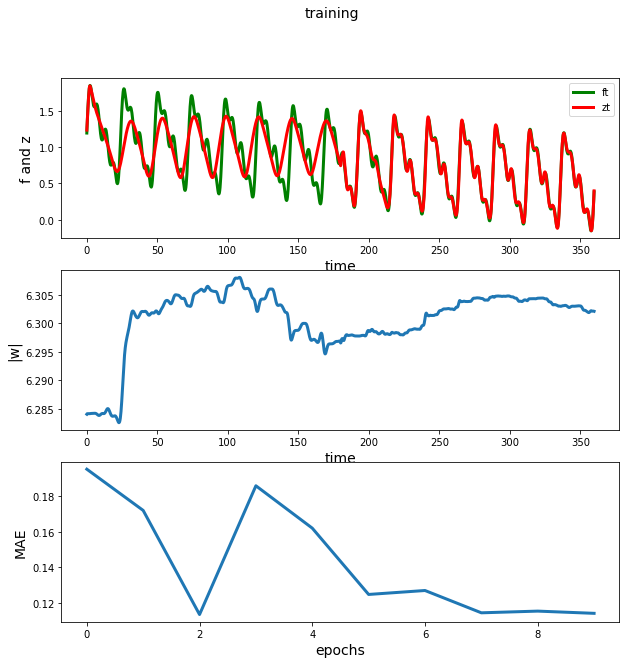

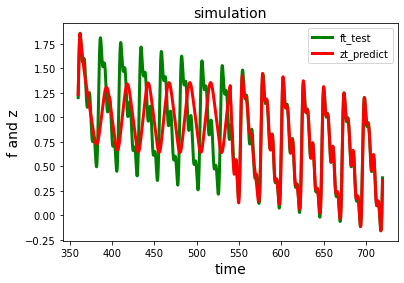

In [8]:
inp_train, ft, hint = get_inp_target_3(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test, ft_test, hint_test = get_inp_target_3(simtime_test, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)

inp_train = np.expand_dims(inp_train, axis=1)
ft = np.expand_dims(ft, axis=1)
hint = np.expand_dims(hint, axis=1)
inp_test = np.expand_dims(inp_test, axis=1)
ft_test = np.expand_dims(ft_test, axis=1)
hint_test = np.expand_dims(hint_test, axis=1)

inp_train = np.hstack((inp_train, np.zeros(ft.shape), np.zeros(hint.shape)))  # (T, 3)
inp_test = np.hstack((inp_test, np.zeros(ft_test.shape), np.zeros(hint_test.shape)))  # (T, 3)

x, rate, zt = network.train(simtime_train, np.squeeze(ft), hp.nsecs_train, hp.dt, hp.tau, inp_train, num_epochs=num_epochs)
zt_predict = network.test(simtime_test, np.squeeze(ft_test), x, rate, hp.dt, hp.tau, inp_test, num_epochs=num_epochs)


epochs.append(copy.deepcopy(network))

plt.show()

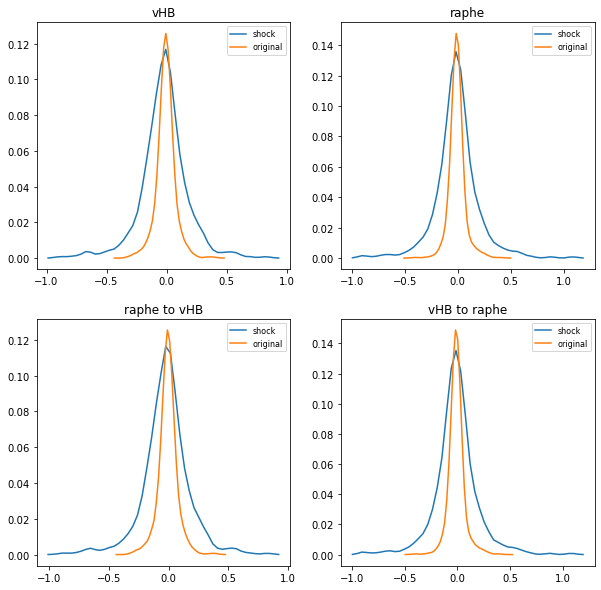

In [35]:
dj = epochs[2].M

raphe_s = dj[:500,:500]
vHB_s = dj[500:, 500:]
r2v_s = dj[:500, 500:]
v2r_s = dj[500:, :500]

oj = epochs[0].M

raphe_o = oj[:500,:500]
vHB_o = oj[500:, 500:]
r2v_o = oj[:500, 500:]
v2r_o = oj[500:, :500]

bins = 50
plt.figure(figsize=(10, 10))
plt.subplot(221)
count_s, bin_s = np.histogram(vHB_s, bins=bins)
count_o, bin_o = np.histogram(vHB_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
plt.title('vHB')
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(222)
plt.title('raphe')
count_s, bin_s = np.histogram(raphe_s, bins=bins)
count_o, bin_o = np.histogram(raphe_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(223)
plt.title('raphe to vHB')
count_s, bin_s = np.histogram(r2v_s, bins=bins)
count_o, bin_o = np.histogram(r2v_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(224)
plt.title('vHB to raphe')
count_s, bin_s = np.histogram(v2r_s, bins=bins)
count_o, bin_o = np.histogram(v2r_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

# plt.subplots_adjust(hspac)

In [28]:
import importlib
importlib.reload(FF)
FF_hp = FF.create_parameters(dt=0.25, network_size=1000)
FF_hp['num_epochs'] = 10
FF_hp['ff_steps_per_update'] = 1
FF_hp['ff_alpha'] = 1
FF_hp['tau'] = 2.5
FF_hp['g'] = 1.3
print(FF_hp)

FF_rnn = FF.RNN(FF_hp, 1, 1)
output = []
Jt = []

J0 = FF_rnn.J

{'network_size': 1000, 'dt': 0.25, 'tau': 2.5, 'noise_std': 0, 'g': 1.3, 'p': 1, 'inp_scale': 1, 'out_scale': 1, 'bias_scale': 0, 'init_act_scale': 1, 'num_epochs': 10, 'ff_steps_per_update': 1, 'ff_alpha': 1, 'ff_init_trials': 3, 'test_init_trials': 1}


## Epoch 1

Initializing...
Training network...
epoch 1 of 10,  1 examples: 
..

/Users/Godwithus/Documents/GitHub/UROP_2020/target_experiment/FF_module.py:254: RuntimeWarning: divide by zero encountered in remainder
  if np.mod(trial, int(input_len / 10)) == 0:


.........mean epoch error:  0.17905981432711823

epoch 2 of 10,  1 examples: 
...........mean epoch error:  0.1534281973727996

epoch 3 of 10,  1 examples: 
...........mean epoch error:  0.15191531975401448

epoch 4 of 10,  1 examples: 
...........mean epoch error:  0.16053724917043163

epoch 5 of 10,  1 examples: 
...........mean epoch error:  0.17996795480804634

epoch 6 of 10,  1 examples: 
...........mean epoch error:  0.1788565297506649

epoch 7 of 10,  1 examples: 
...........mean epoch error:  0.1740763221089345

epoch 8 of 10,  1 examples: 
...........mean epoch error:  0.17738949219823738

epoch 9 of 10,  1 examples: 
...........mean epoch error:  0.1985203083978163

epoch 10 of 10,  1 examples: 
...........mean epoch error:  0.17105325908294305

Done training!


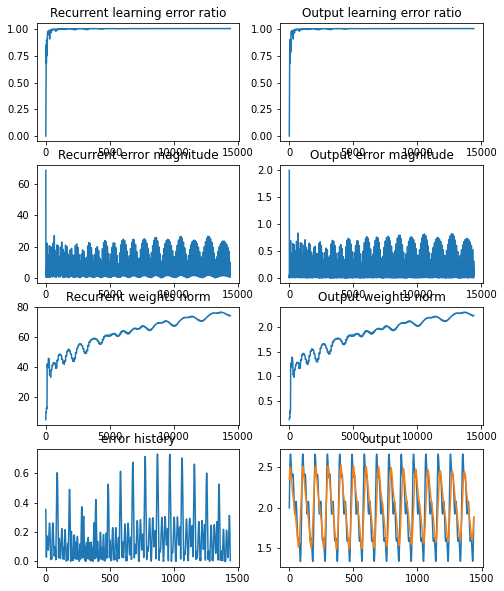

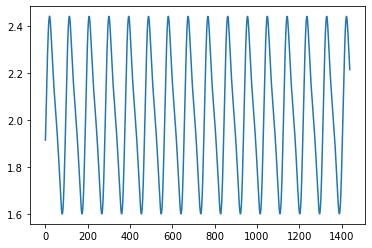

In [29]:
FF_rnn.J = J0
output.append(FF_rnn.train(get_inp_target_1_FF, monitor_training=1, DRNN=epochs[0], voltage=5, amp=hp.amp, freq=hp.freq, noise_scale=0.001))
Jt.append(FF_rnn.J)

inp, targ, _ = get_inp_target_1_FF(hp.dt, voltage=5, amp=hp.amp, freq=hp.freq, T=360, noise_scale=0.001)
z, x = FF_rnn.run(inp[0])
plt.figure()
plt.plot(z)

## Epoch 2

Initializing...
Training network...
epoch 1 of 10,  1 examples: 
..

/Users/Godwithus/Documents/GitHub/UROP_2020/target_experiment/FF_module.py:254: RuntimeWarning: divide by zero encountered in remainder
  if np.mod(trial, int(input_len / 10)) == 0:


.........mean epoch error:  0.188795543794607

epoch 2 of 10,  1 examples: 
...........mean epoch error:  0.24567644703804406

epoch 3 of 10,  1 examples: 
...........mean epoch error:  0.22858263627863665

epoch 4 of 10,  1 examples: 
...........mean epoch error:  0.23136145995442933

epoch 5 of 10,  1 examples: 
...........mean epoch error:  0.21871978891576072

epoch 6 of 10,  1 examples: 
...........mean epoch error:  0.20425588436407208

epoch 7 of 10,  1 examples: 
...........mean epoch error:  0.19703598709938677

epoch 8 of 10,  1 examples: 
...........mean epoch error:  0.19671011751058082

epoch 9 of 10,  1 examples: 
...........mean epoch error:  0.19140999925924615

epoch 10 of 10,  1 examples: 
...........mean epoch error:  0.17531667223590608

Done training!


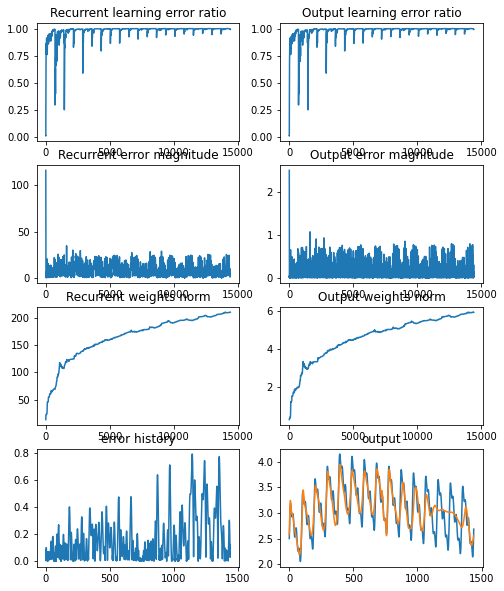

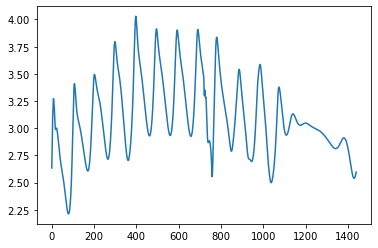

In [30]:
FF_rnn.J = J0
output.append(FF_rnn.train(get_inp_target_2_FF, monitor_training=1, voltage=5, amp=hp.amp, freq=hp.freq, DRNN=epochs[1], noise_scale=0.001))
Jt.append(FF_rnn.J)

inp, targ, _ = get_inp_target_2_FF(hp.dt, voltage=5, amp=hp.amp, freq=hp.freq, T=360, noise_scale=0.001)
z, x = FF_rnn.run(inp[0])
plt.figure()
plt.plot(z)

## Epoch 3

Initializing...
Training network...
epoch 1 of 10,  1 examples: 
..

/Users/Godwithus/Documents/GitHub/UROP_2020/target_experiment/FF_module.py:254: RuntimeWarning: divide by zero encountered in remainder
  if np.mod(trial, int(input_len / 10)) == 0:


.........mean epoch error:  0.14789807350960238

epoch 2 of 10,  1 examples: 
...........mean epoch error:  0.1386146893660839

epoch 3 of 10,  1 examples: 
...........mean epoch error:  0.12357713599549369

epoch 4 of 10,  1 examples: 
...........mean epoch error:  0.13992548142675282

epoch 5 of 10,  1 examples: 
...........mean epoch error:  0.1457461316945606

epoch 6 of 10,  1 examples: 
...........mean epoch error:  0.13703109198255276

epoch 7 of 10,  1 examples: 
...........mean epoch error:  0.12622751860536954

epoch 8 of 10,  1 examples: 
...........mean epoch error:  0.12358634173126438

epoch 9 of 10,  1 examples: 
...........mean epoch error:  0.12428081950862714

epoch 10 of 10,  1 examples: 
...........mean epoch error:  0.11773390619525172

Done training!


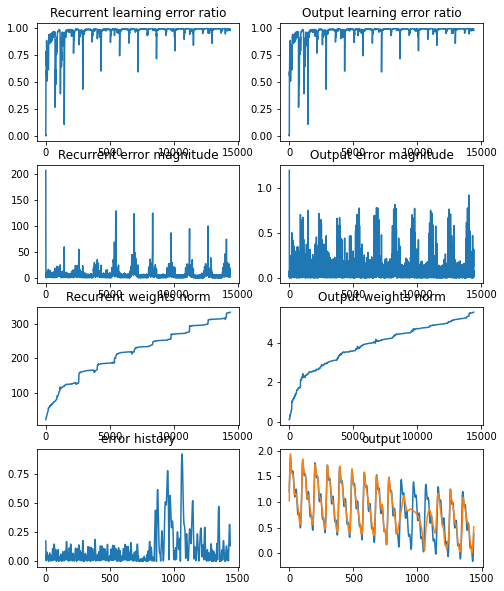

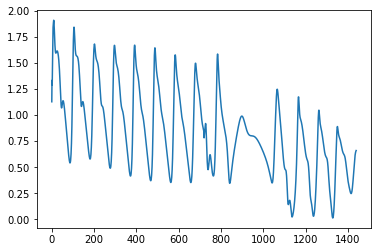

In [31]:
FF_rnn.J = J0
output.append(FF_rnn.train(get_inp_target_3_FF, monitor_training=1, voltage=5, amp=hp.amp, freq=hp.freq, DRNN=epochs[2], noise_scale=0.001))
Jt.append(FF_rnn.J)

inp, targ, _ = get_inp_target_3_FF(hp.dt, voltage=5, amp=hp.amp, freq=hp.freq, T=360, noise_scale=0.001)
z, x = FF_rnn.run(inp[0])
plt.figure()
plt.plot(z)

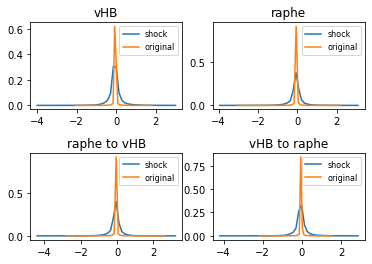

In [32]:
raphe_s = Jt[2][:500,:500]
vHB_s = Jt[2][500:, 500:]
r2v_s = Jt[2][:500, 500:]
v2r_s = Jt[2][500:, :500]

raphe_o = Jt[0][:500,:500]
vHB_o = Jt[0][500:, 500:]
r2v_o = Jt[0][:500, 500:]
v2r_o = Jt[0][500:, :500]

bins = 50
plt.subplot(221)
count_s, bin_s = np.histogram(vHB_s, bins=bins)
count_o, bin_o = np.histogram(vHB_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
plt.title('vHB')
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(222)
plt.title('raphe')
count_s, bin_s = np.histogram(raphe_s, bins=bins)
count_o, bin_o = np.histogram(raphe_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(223)
plt.title('raphe to vHB')
count_s, bin_s = np.histogram(r2v_s, bins=bins)
count_o, bin_o = np.histogram(r2v_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplot(224)
plt.title('vHB to raphe')
count_s, bin_s = np.histogram(v2r_s, bins=bins)
count_o, bin_o = np.histogram(v2r_o, bins=bins)
count_s = count_s / np.sum(count_s)
count_o = count_o / np.sum(count_o)
line1, = plt.plot(bin_s[:-1], count_s)
line2, = plt.plot(bin_o[:-1], count_o)
plt.legend((line1, line2), ('shock','original'), loc='upper right', prop={'size': 8})

plt.subplots_adjust(hspace=0.5)